<a href="https://colab.research.google.com/github/SShresth7272/Python-Code/blob/main/Project_2_Financial_Data_Analysis_using_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 10 days of stock data:
   Day       Price  Daily_Return
0    1  100.004967           NaN
1    2  100.003584     -0.000014
2    3  100.010061      0.000065
3    4  100.025292      0.000152
4    5  100.022950     -0.000023
5    6  100.020609     -0.000023
6    7  100.036401      0.000158
7    8  100.044075      0.000077
8    9  100.039381     -0.000047
9   10  100.044806      0.000054

DataFrame shape: (252, 3)

Summary Statistics:
Average Price: $99.93
Price Standard Deviation: $0.0460
Average Daily Return: -0.0000 (-0.00%)
Daily Return Standard Deviation: 0.0001


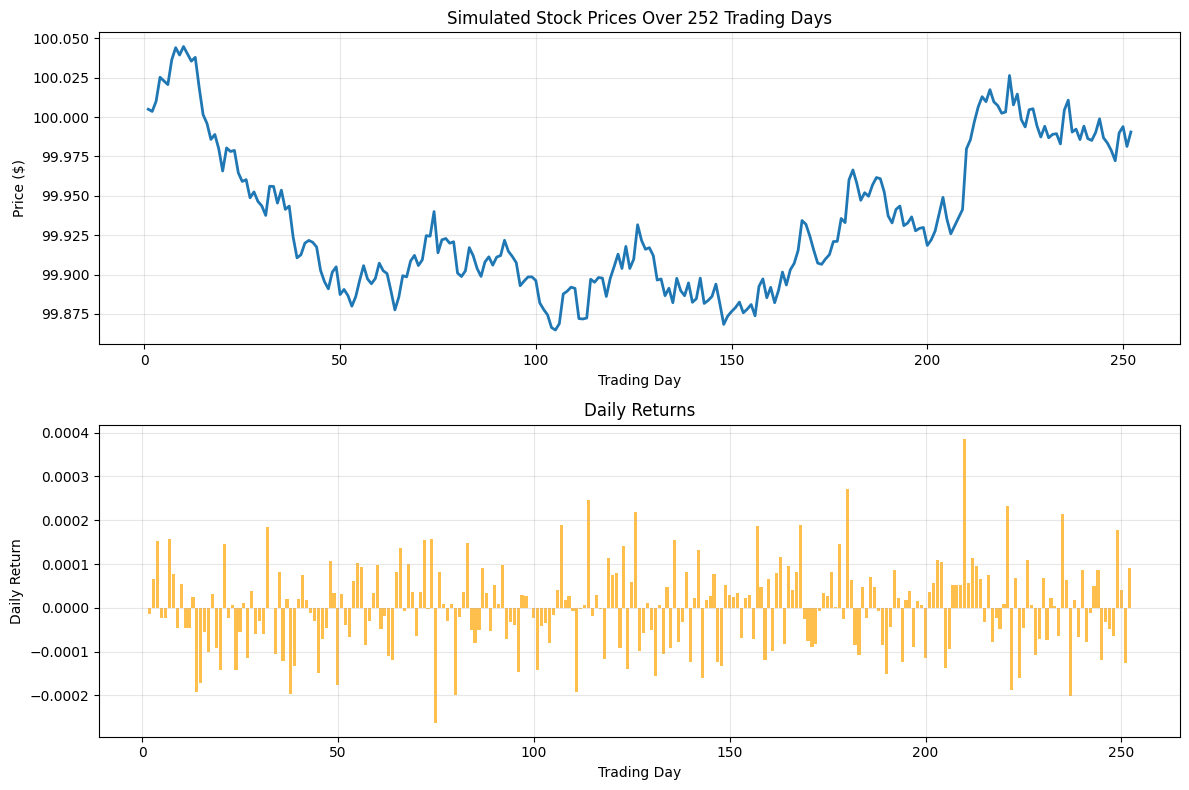


Total Return over 251 days: -0.0001 (-0.01%)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create simulated stock prices using random walk
prices = np.cumsum(np.random.randn(252) * 0.01) + 100

# Create a DataFrame with the prices
trading_days = np.arange(1, 253)
df = pd.DataFrame({
    'Day': trading_days,
    'Price': prices
})

# Calculate daily returns using array slicing
returns = (prices[1:] / prices[:-1]) - 1

# Add returns to the DataFrame (first day has no return)
df['Daily_Return'] = np.append(np.nan, returns)

print("First 10 days of stock data:")
print(df.head(10))
print(f"\nDataFrame shape: {df.shape}")

# Display summary statistics
print("\nSummary Statistics:")
print(f"Average Price: ${df['Price'].mean():.2f}")
print(f"Price Standard Deviation: ${df['Price'].std():.4f}")
print(f"Average Daily Return: {df['Daily_Return'].mean():.4f} ({df['Daily_Return'].mean()*100:.2f}%)")
print(f"Daily Return Standard Deviation: {df['Daily_Return'].std():.4f}")

# Plot the results
plt.figure(figsize=(12, 8))

# Plot 1: Stock prices over time
plt.subplot(2, 1, 1)
plt.plot(df['Day'], df['Price'], linewidth=2)
plt.title('Simulated Stock Prices Over 252 Trading Days')
plt.xlabel('Trading Day')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)

# Plot 2: Daily returns
plt.subplot(2, 1, 2)
plt.bar(df['Day'][1:], df['Daily_Return'][1:], alpha=0.7, color='orange')
plt.title('Daily Returns')
plt.xlabel('Trading Day')
plt.ylabel('Daily Return')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional analysis: Cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1
print(f"\nTotal Return over 251 days: {cumulative_returns[-1]:.4f} ({cumulative_returns[-1]*100:.2f}%)")

In [3]:
print("Annual Volatility:", np.std(returns) * np.sqrt(252))
print("Max Drawdown:", np.min((np.maximum.accumulate(prices) - prices) / np.maximum.accumulate(prices)))
positive_returns = returns[returns > 0]
negative_returns = returns[returns < 0]
print("Gain/Loss Ratio:", np.mean(positive_returns) / -np.mean(negative_returns))

Annual Volatility: 0.0015355454425137734
Max Drawdown: 0.0
Gain/Loss Ratio: 0.9317364846717497
